In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

In [3]:
import os
source_dir=os.path.join('/kaggle','input','testttttt','train')

In [4]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata(source_dir)


"""
he code defines a class IdentityMetadata which takes in three arguments 

in its constructor: base, name, and file. base is the base directory

where the images are located, name is the identity name, and file is the image file name. The class has a method image_path() which returns the full path of the image by joining the base directory, identity name, and file name.

It also defines a function load_metadata(path) which takes in a single

argument, path, which is the directory where the images are located. 

The function creates an empty list called metadata. It then iterates over all the subdirectories in path and then iterates over all the files in each subdirectory. For each file, it checks the file extension to ensure that it is either a .jpg or .jpeg file. If the file is a .jpg or .jpeg file, it creates an instance of the IdentityMetadata class and passes in the path, subdirectory name and the file name as arguments and appends the instance to the metadata list. The function then returns a numpy array of the metadata.

The last line of the code is commented out, but it appears to be trying

to load metadata from the directory 'images' or 'source_dir' by calling 

the load_metadata() function with the appropriate directory as the argument.

"""




In [5]:
print('metadata shape :', metadata.shape)

metadata shape : (268,)


In [6]:
metadata[260]

/kaggle/input/testttttt/train/elton_john/httpftqncomymusicLxZeltonjohnjpg.jpg

In [7]:
type(metadata[1]), metadata[1].image_path()

(__main__.IdentityMetadata,
 '/kaggle/input/testttttt/train/arnold_schwarzenegger/359px-Arnold_Schwarzenegger_2003.jpg')

In [8]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]


"""
The code defines a function load_image(path) which 

takes a single argument path, which is the path of

the image to be loaded. The function uses the OpenCV

library to read the image at the specified path. The cv2.imread() 

function is used to read an image from a file, the

first argument is the path of the image, the second

argument is a flag that specifies the way the image

should be read. In this case, the value of 1 indicates 

that the image should be loaded in color.

The function then returns the image using slicing 

with img[...,::-1] which will reverse the order of

the color channels of the image from BGR to RGB.

This is because OpenCV loads images with color 

channels in BGR order, whereas most image processing

libraries, such as PIL, expect images to be in RGB order.

""""

In [9]:
load_image('/kaggle/input/testttttt/train/anne_hathaway/353px-Anne_Hathaway_2019_(cropped).jpg')

array([[[166, 120,  86],
        [171, 125,  91],
        [176, 129,  99],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  3,   3,   3]],

       [[169, 123,  89],
        [170, 124,  90],
        [171, 124,  94],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  3,   3,   3]],

       [[167, 121,  87],
        [165, 119,  85],
        [164, 117,  87],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  4,   4,   4]],

       ...,

       [[ 14,  14,  14],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [ 11,  11,  11],
        [ 10,  10,  10],
        [  9,   9,   9]],

       [[ 15,  15,  15],
        [ 16,  16,  16],
        [ 16,  16,  16],
        ...,
        [ 11,  11,  11],
        [ 10,  10,  10],
        [ 11,  11,  11]],

       [[ 17,  17,  17],
        [ 18,  18,  18],
        [ 17,  17,  17],
        ...,
        [ 11,  11,  11],
        [ 10,  10,  10],
        [ 12,  12,  12]]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model




"""
The code defines a function vgg_face() which creates 
and returns a Keras model for facial recognition.
The model is based on the VGG-Face architecture, which is a
variant of the VGG-16 architecture 
that is specifically designed for facial recognition tasks.
The model is a Sequential model and it starts by adding a 
ZeroPadding2D layer with input_shape of
(224,224,3), followed by a 2D convolutional layer with 64 filters
of size (3,3) and a ReLU activation function. Next, it adds another
ZeroPadding2D layer and a Convolution2D layer with the same parameters as the previous one. 
Then it uses a max pooling layer with pool size (2,2) and strides of (2,2).
The architecture continues to use the similar pattern of ZeroPadding2D, convolutional layer,
ZeroPadding2D, convolutional layer and max pooling layers several times, each time increasing the 
number of filters and reducing the spatial dimensions of the feature maps.
Finally, it uses a fully connected layers with 4096 units and ReLU activation function,
dropout layer with 0.5 rate, another fully connected layer with 4096 units and ReLU activation
function, another dropout layer with 0.5 rate, another fully connected layer with 2622 units 
and a final flatten and softmax activation layers.
This architecture was trained on a large dataset of facial images and is able to extract 
features that are useful for facial recognition tasks.

"""



In [12]:
model = vgg_face()

model.load_weights('/kaggle/input/vgg-face-weights/vgg_face_weights.h5')

In [13]:
model.layers[0], model.layers[-2]

(<tensorflow.python.keras.layers.convolutional.ZeroPadding2D at 0x7fd154dba050>,
 <tensorflow.python.keras.layers.core.Flatten at 0x7fd12022a8d0>)

In [14]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

""""

The code creates a new Keras model vgg_face_descriptor based on an existing 
model model that was defined earlier. The new model is created using the functional API of Keras and it
is a descriptor model that takes the same input as the original model but it
only outputs the features from the penultimate layer before the last one.

The Model() function is used to create the new model and it takes two arguments: 
inputs and outputs. The inputs argument is set to model.layers[0].input, which
corresponds to the input layer of the original model. The outputs argument is 
set to model.layers[-2].output, which corresponds to the output of the penultimate
layer before the last one in the original model.

The vgg_face_descriptor model will be used to generate the feature embeddings 
of the image which can be compared to other embeddings to find the similarity 
and make a prediction. The final layers of the original model are not necessary for this task.


"""




In [15]:
type(vgg_face_descriptor)

tensorflow.python.keras.engine.functional.Functional

In [16]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_13_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten_1')>])

In [17]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)








"""The code first gets the path of the first image in the metadata
using metadata[0].image_path(). It then uses the load_image() 
function to load the image and normalizes the pixel values from [0-255] to [0-1] by 
dividing the image by 255.0 and casting the result to a float32 data type.
Then it resizes the image to (224,224) using cv2.resize() function.
The image is passed through the vgg_face_descriptor model
using vgg_face_descriptor.predict() function which will return an
embedding vector for the image.
It first wraps the image in a numpy array using np.expand_dims(img, axis=0)
so that the model can process it, and then it takes the first element of 
the returned predictions and assigns it to the embedding_vector variable. 
The shape of the image and the embedding vector is printed.
The embedding vector is a feature representation of the image and can be
used for facial recognition tasks such as face verification, and face clustering.""""






(224, 224, 3)
(2622,)


In [18]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.005535199, numpy.ndarray, numpy.float32)

In [19]:
embedding_vector[2], embedding_vector[98], embedding_vector[-2]

(0.0064299176, 0.0024917729, 0.01193031)

In [20]:
total_images = len(metadata)

print('total_images :', total_images)

total_images : 268


In [22]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector
    
    
    """
This code generates an array of embedding vectors for a set of images, represented by the variable "metadata". The array, named "embeddings", is initialized with zeros and has a shape of (number of images, 2622), where the 2622 is the dimension of the embedding vector.

It then iterates through the metadata array and for each image, it:

- loads the image with the path obtained from metadata[i].image_path()
- scales the pixel values from [0-255] to [0-1]
- resizes the image to (224,224)
- generates the embedding vector for the image using the vgg_face_descriptor model and
 assigns the embedding vector to the corresponding index in embeddings array.


In summary, this code generates an array of 
embedding vectors for a set of images using the
vgg_face_descriptor model and assigns each embedding 
vector to the corresponding index in the "embeddings" array.
    """
    
    
    
    
    

In [23]:
print('embeddings shape :', embeddings.shape)

embeddings shape : (268, 2622)


In [24]:
embeddings[0], embeddings[100], embeddings[200].shape

(array([ 0.0055352 ,  0.00951357,  0.00642992, ..., -0.00044648,
         0.01193031,  0.01201306]),
 array([ 0.00964766,  0.01239621,  0.01409549, ..., -0.0064505 ,
         0.00929805,  0.01305967]),
 (2622,))

In [25]:
embeddings[100]

array([ 0.00964766,  0.01239621,  0.01409549, ..., -0.0064505 ,
        0.00929805,  0.01305967])

In [26]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

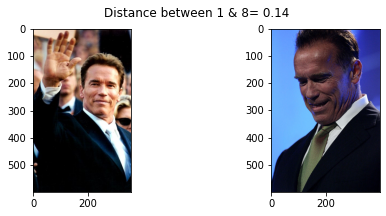

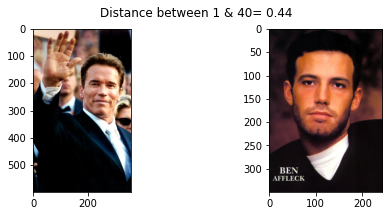

In [28]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(1, 8)
show_pair(1, 40)

In [29]:
train_idx = np.arange(metadata.shape[0]) %12  != 0     #every 12th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 12 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]


"""
In summary, this code is splitting the 
embeddings and targets into training and
testing sets with a ratio of 11:1.
"""

In [30]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (245,2622)
y_train shape : (245,)
X_test shape : (23,2622)
y_test shape : (23,)


In [31]:
y_test[0], y_train[150]

('arnold_schwarzenegger', 'sofia_vergara')

In [32]:
len(np.unique(y_test)), len(np.unique(y_train))

(14, 14)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [34]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['anne_hathaway' 'arnold_schwarzenegger' 'ben_afflek' 'dwayne_johnson'
 'elton_john' 'jerry_seinfeld' 'kate_beckinsale' 'keanu_reeves'
 'lauren_cohan' 'madonna' 'mindy_kaling' 'simon_pegg' 'sofia_vergara'
 'will_smith']


In [35]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13  8  8  8  8  8  8  8  8  8  8  8  8 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  6
  6  6  6  6  6  6  6  6  6  6  6  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4]
y_test_encoded :  [ 1  1  2  2 13  8 11 11  7 10 10 10  3 12  5  5  5  0  6  9  9  4  4]


In [36]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [37]:
X_test_std = scaler.transform(X_test)

In [38]:
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (245,2622)
y_train_encoded shape : (245,)
X_test_std shape : (23,2622)
y_test_encoded shape : (23,)


In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform((X_test_std))



""""
This code is using the PCA (Principal Component Analysis)
method from the scikit-learn library to reduce the dimensionality of the input data.
It first creates an instance of the PCA class with
n_components = 128, which means it will keep the 
first 128 principal components and discard the rest.
It then uses the fit_transform() method on the 
X_train_std data to compute the principal components
and create a new array named X_train_pca with the transformed data.
It also applies the transform() method on the
X_test_std data to create a new array named
X_test_pca with the transformed data.
In summary, this code is using PCA to reduce 
the dimensionality of the X_train_std and 
X_test_std data to 128 features and creating 
new arrays X_train_pca and X_test_pca with 
the transformed data.

""""

In [40]:
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.00085)
clf.fit(X_train_pca, y_train_encoded)

""""
This code is using the SVM (Support Vector Machine)
algorithm from the scikit-learn library to train a model for classification.
It first creates an instance of the SVC
(Support Vector Classification) class with specific hyperparameters C=5. and gamma=0.00085.
C is a regularization parameter that 
trades off correct classification of 
training examples against maximization of the decision function's margin. A smaller value for C will result in a larger margin but will classify some examples incorrectly.
Gamma parameter defines how far the
influence of a single training example
reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can
be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
Then, it uses the fit() method to
train the model on the X_train_pca data 
and y_train_encoded labels.
In summary, this code is using an
SVM algorithm to train a model on the 
X_train_pca data and y_train_encoded 
labels with specific hyperparameters C and gamma

"""


SVC(C=5.0, gamma=0.00085)

In [41]:
y_predict = clf.predict(X_test_pca)

In [42]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [ 1  4  2  2 13 10 12 11  0 10 10 10  3 10  5  5  2  0  2  9  9  4  9]
y_test_encoded :  [ 1  1  2  2 13  8 11 11  7 10 10 10  3 12  5  5  5  0  6  9  9  4  4]


In [43]:
y_predict_encoded = le.inverse_transform(y_predict)

In [44]:
print('y_predict_encoded : ',y_predict_encoded)

y_predict_encoded :  ['arnold_schwarzenegger' 'elton_john' 'ben_afflek' 'ben_afflek'
 'will_smith' 'mindy_kaling' 'sofia_vergara' 'simon_pegg' 'anne_hathaway'
 'mindy_kaling' 'mindy_kaling' 'mindy_kaling' 'dwayne_johnson'
 'mindy_kaling' 'jerry_seinfeld' 'jerry_seinfeld' 'ben_afflek'
 'anne_hathaway' 'ben_afflek' 'madonna' 'madonna' 'elton_john' 'madonna']


In [45]:
print('y_predict shape : ', y_predict.shape)
print('y_test_encoded shape : ', y_test_encoded.shape)

y_predict shape :  (23,)
y_test_encoded shape :  (23,)


In [46]:
y_test_encoded[32:49]

array([], dtype=int64)

In [47]:
# Find the classification accuracy
accuracy_score(y_test_encoded, y_predict)

0.6521739130434783

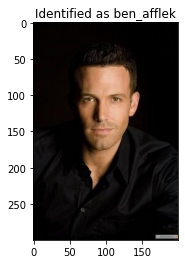

In [48]:
example_idx = 3

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

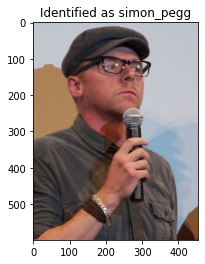

In [485]:
example_idx = 7

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

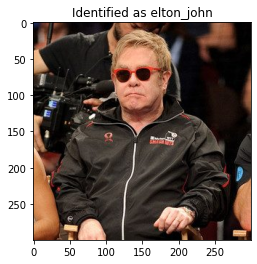

In [76]:
example_idx =17

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] 
example_identity =  y_predict_encoded[example_idx] 

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

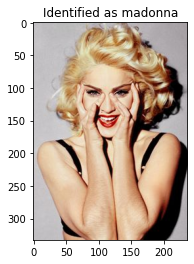

In [79]:
example_idx = 29

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');